C:\Users\judah\AppData\Local\Temp\ipykernel_18144\1295536649.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[df.applymap(lambda x: x != '--')]


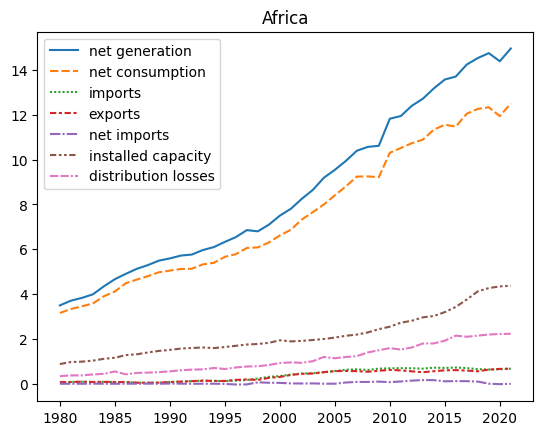

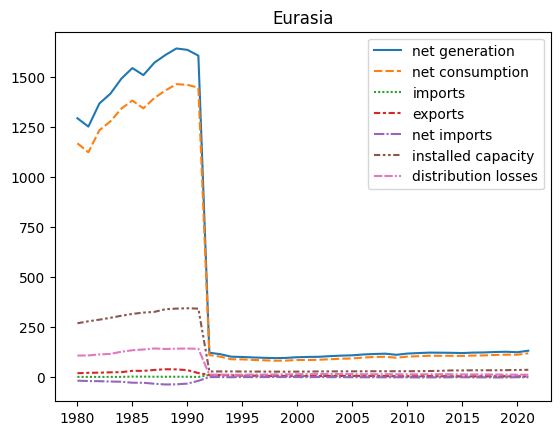

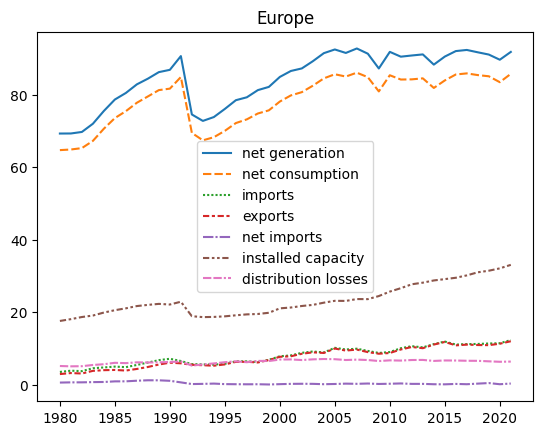

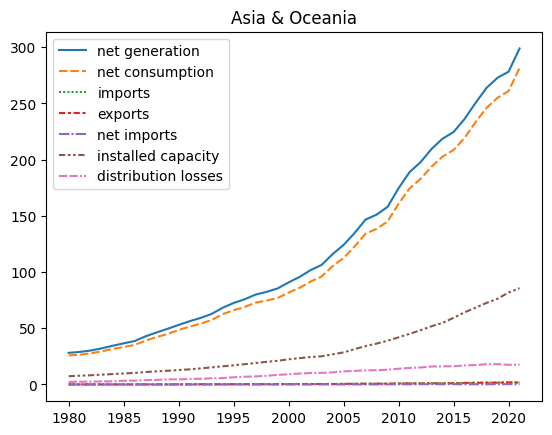

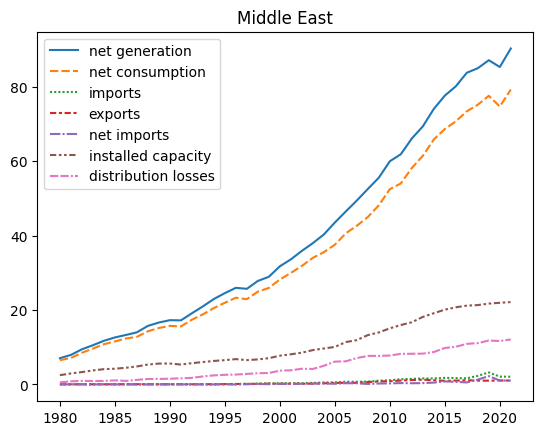

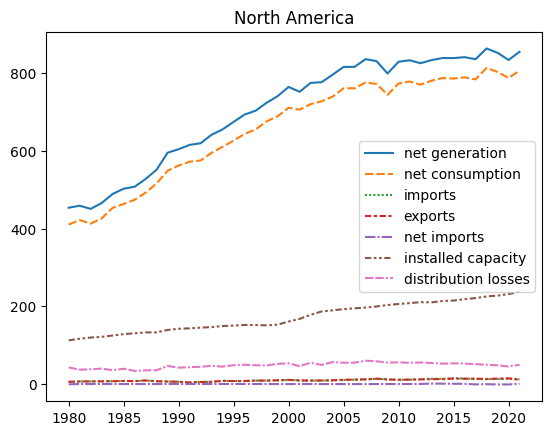

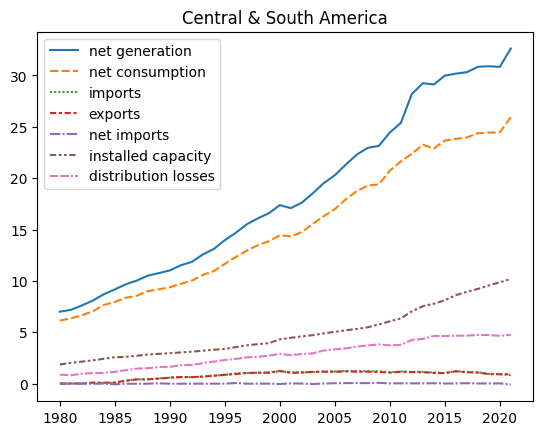

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import seaborn as sns
import numpy as np

# Decision Tree Classifier
df = pd.read_csv('../datasets/global_electricity_stats.csv')

df = df.dropna()
df = df[df.applymap(lambda x: x != '--')]

regions = df['Region'].unique()
years = [str(year) for year in range(1980, 2022)]
features = df['Features'].unique()
region_dataframes = {}

for region in regions:
    # Create a DataFrame to store the mean values for each feature and year
    means_df = pd.DataFrame(index=features, columns=years)

    region_df = df[df['Region'] == region]
    region_df = region_df.drop(['Region', 'Country'], axis=1)

    for feature in features:
        region_feature = region_df[region_df["Features"] == feature]
        region_feature = region_feature.drop(['Features'], axis=1)

        for year in years:
            # Convert the year column to numeric
            region_feature[year] = pd.to_numeric(region_feature[year], errors='coerce')

            # Calculate the mean
            mean = region_feature[year].mean()

            # Store the mean in the means_df DataFrame
            means_df.at[feature, year] = mean

    # Store the means_df DataFrame in the region_dataframes dictionary
    region_dataframes[region] = means_df.T

for region in region_dataframes:
    region_dataframes[region]
    plt.title(region)
    plt.xticks(range(0, len(region_dataframes[region].index), 5))
    sns.lineplot(data=region_dataframes[region])
    plt.show()


In [186]:
# Create Energy Need Target Column
# Energy Need = Net Consumption + Distribution Losses + Exports − Net Generation − Net Import
for region in region_dataframes:
    df = region_dataframes[region]
    
    # Ensure all columns are in numeric form
    for col in ['net consumption', 'distribution losses', 'net generation', 'net imports']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate energy need
    df['energy need'] = df['net consumption'] + df['distribution losses'] + df['exports'] - df['net generation'] - df['net imports']
    
    # Fill NaN values in 'energy need' with zeros if that's the desired behavior
    df['energy need'] = df['energy need'].fillna(0)

    # Update the DataFrame in the dictionary
    region_dataframes[region] = df

# Display the DataFrame for 'Europe' to verify the result
region_dataframes['Africa']


,net generation,net consumption,imports,exports,net imports,installed capacity,distribution losses,energy need
1980,3.496019,3.155499,0.070926,0.070926,-4.189521e-18,0.879849,0.340520,0.070926
1981,3.705439,3.333403,0.078185,0.078185,2.094760e-18,0.969516,0.372036,0.078185
1982,3.829026,3.456015,0.090611,0.090444,1.698113e-04,0.986479,0.373177,0.090441
1983,3.988430,3.578041,0.081926,0.076778,5.245283e-03,1.031105,0.415537,0.076681
1984,4.345869,3.903158,0.084074,0.08313,9.622642e-04,1.112568,0.443655,0.083112
1985,4.663919,4.116024,0.076519,0.076519,-4.189521e-18,1.159364,0.547894,0.076519
1986,4.904820,4.486399,0.077426,0.075296,2.169811e-03,1.280234,0.420551,0.075256
1987,5.127463,4.647555,0.048611,0.044907,3.773585e-03,1.314882,0.483611,0.044838
1988,5.292587,4.799914,0.047963,0.043,5.056604e-03,1.395345,0.497636,0.042906
1989,5.491284,4.973416,0.050037,0.048222,1.849057e-03,1.465597,0.519683,0.048188


In [187]:
# # Decision Tree Regression
# from sklearn.tree import DecisionTreeRegressor

# # Iterate over each region in region_dataframes
# for region in region_dataframes:
#     # Prepare the data for the specific region
#     region_energy_df = region_dataframes[region]['energy need'].reset_index()
#     region_energy_df.columns = ['Year', 'energy need']
#     region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

#     # Split the DataFrame into features (X) and target (y)
#     X = region_energy_df[['Year']]
#     y = region_energy_df['energy need']

#     # Fit the regression model to the historical data
#     regressor = DecisionTreeRegressor(random_state=0)
#     regressor.fit(X, y)

#     # Prepare the forecast years
#     max_year = X['Year'].max()
#     forecast_years = np.arange(max_year + 1, max_year + 11).reshape(-1, 1)

#     # Create a DataFrame for the forecast data
#     forecast_df = pd.DataFrame(forecast_years, columns=['Year'])
#     forecast_df['energy need forecast'] = regressor.predict(forecast_df[['Year']])

#     # Combine historical and forecast data for plotting
#     combined_df = pd.concat([region_energy_df, forecast_df], ignore_index=True)

#     # Plotting the historical and forecasted 'energy need'
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(x='Year', y='energy need', data=region_energy_df, marker='o', label='Historical Data')
#     sns.lineplot(x='Year', y='energy need forecast', data=forecast_df, label='Forecast', linestyle='--')

#     plt.title(f'Forecast of {region} Energy Need')
#     plt.xlabel('Year')
#     plt.ylabel('Energy Need (billion kWh)')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()


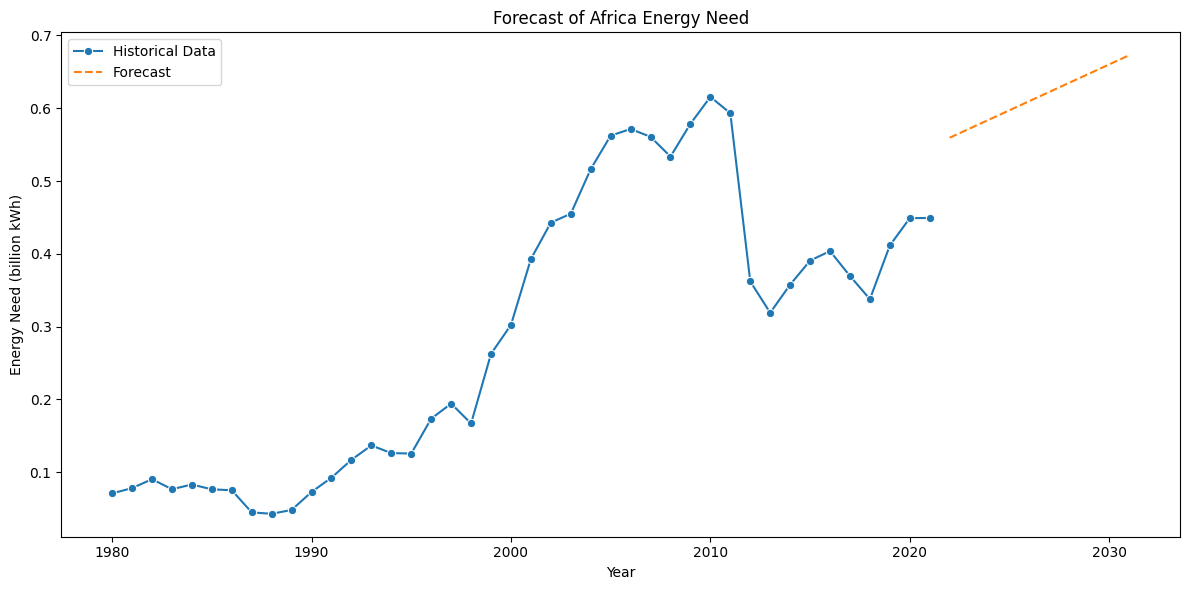

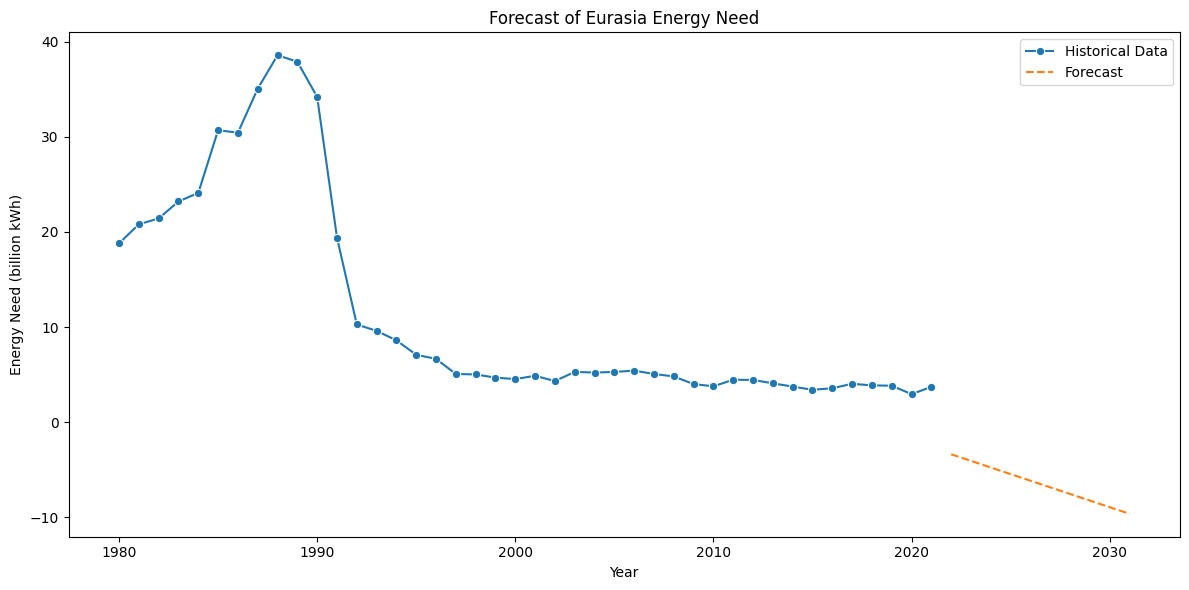

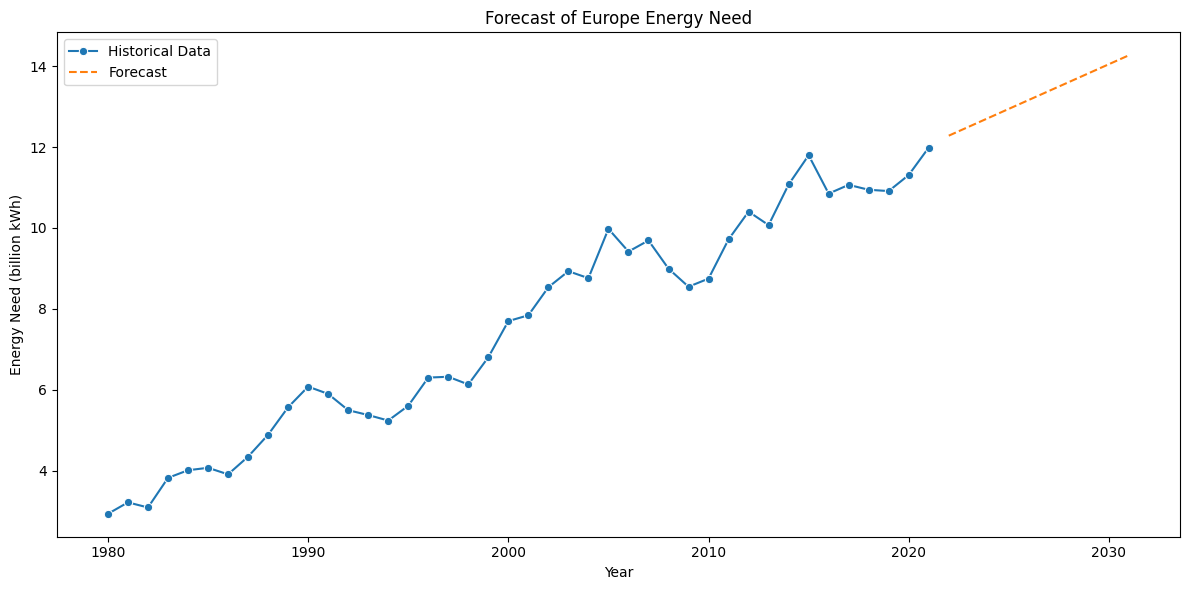

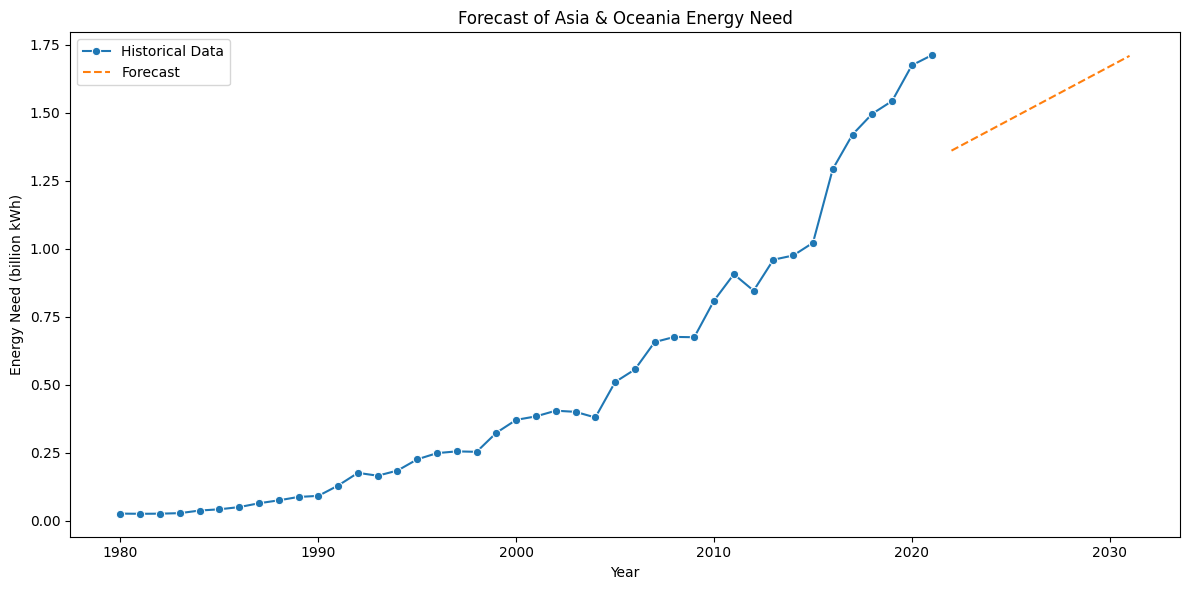

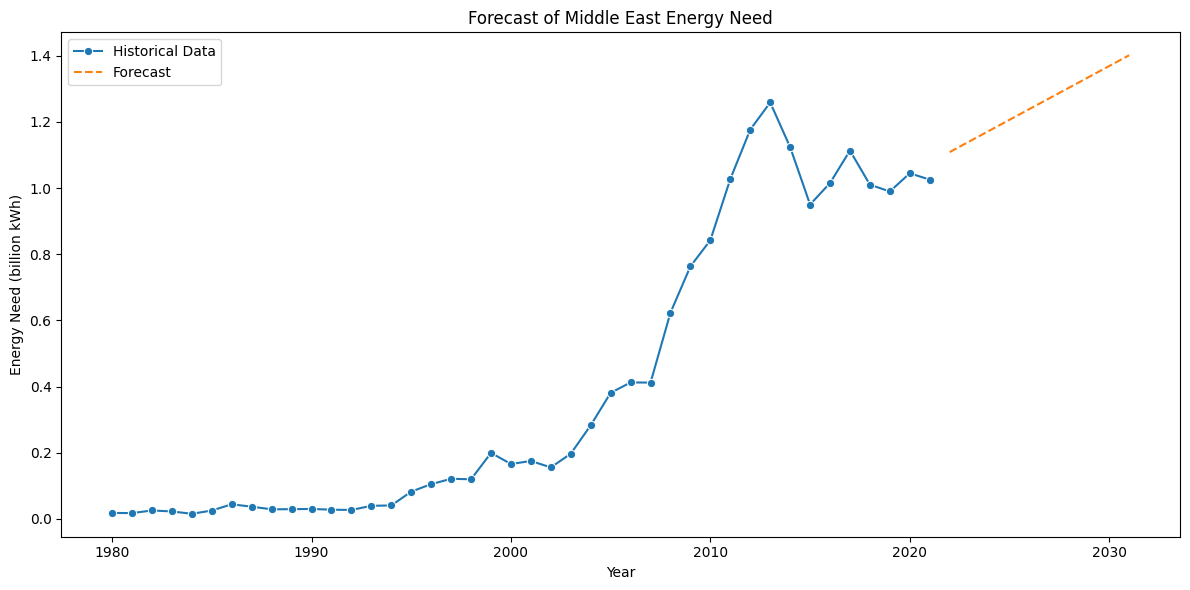

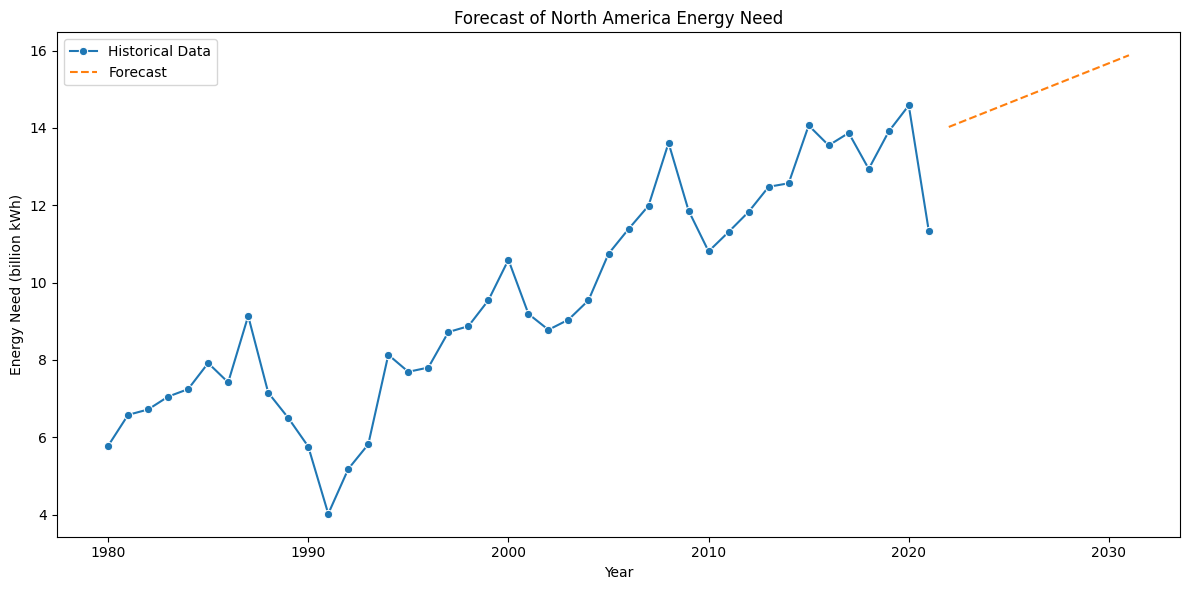

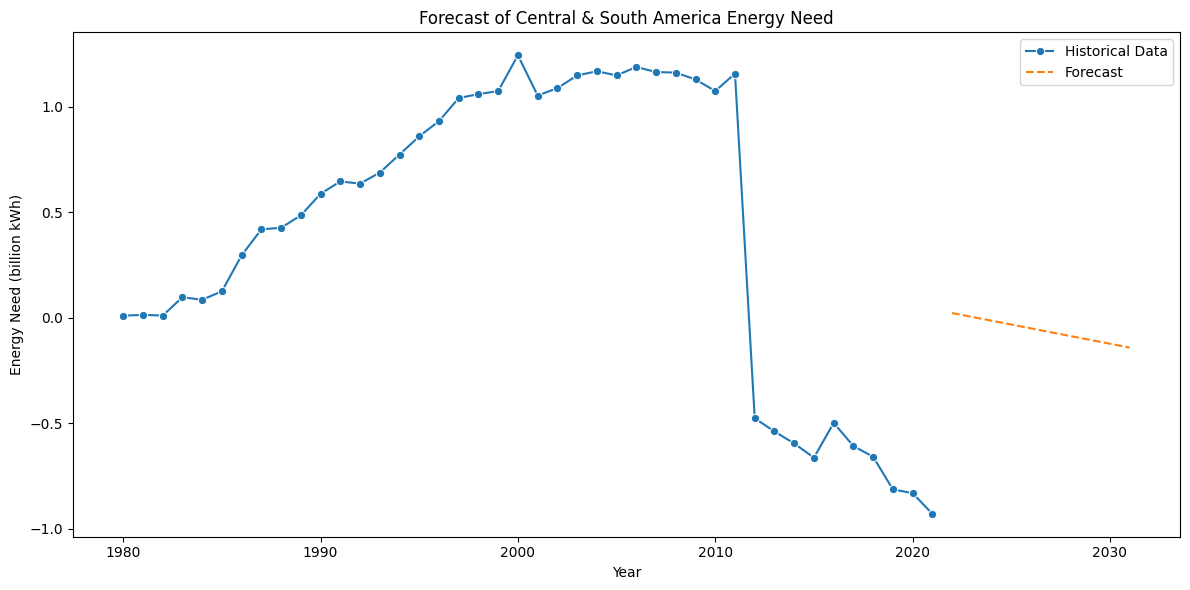

In [188]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Iterate over each region in region_dataframes
for region in region_dataframes:
    # Prepare the data for the specific region
    region_energy_df = region_dataframes[region]['energy need'].reset_index()
    region_energy_df.columns = ['Year', 'energy need']
    region_energy_df['Year'] = pd.to_numeric(region_energy_df['Year'])

    # Split the DataFrame into features (X) and target (y)
    X = region_energy_df[['Year']]
    y = region_energy_df['energy need']

    # Fit the regression model to the historical data
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Prepare the forecast years
    max_year = X['Year'].max()
    forecast_years = np.arange(max_year + 1, max_year + 11).reshape(-1, 1)

    # Create a DataFrame for the forecast data
    forecast_df = pd.DataFrame(forecast_years, columns=['Year'])
    forecast_df['energy need forecast'] = regressor.predict(forecast_df[['Year']])

    # Combine historical and forecast data for plotting
    combined_df = pd.concat([region_energy_df, forecast_df], ignore_index=True)

    # Plotting the historical and forecasted 'energy need'
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='energy need', data=region_energy_df, marker='o', label='Historical Data')
    sns.lineplot(x='Year', y='energy need forecast', data=forecast_df, label='Forecast', linestyle='--')

    plt.title(f'Forecast of {region} Energy Need')
    plt.xlabel('Year')
    plt.ylabel('Energy Need (billion kWh)')
    plt.legend()
    plt.tight_layout()
    plt.show()